In [4]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
data = pd.read_csv('https://raw.githubusercontent.com/ywchiu/riii/master/data/house-prices.csv')

# Mostrar las primeras filas del dataset
print(data.head())

# Resumen estadístico de las columnas
print(data.describe())

# Información sobre los tipos de datos
print(data.info())

   Home   Price  SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0     1  114300  1790         2          2       2    No         East
1     2  114200  2030         4          2       3    No         East
2     3  114800  1740         3          2       1    No         East
3     4   94700  1980         3          2       3    No         East
4     5  119800  2130         3          3       3    No         East
             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%     64.500000  125950.000000  2000.000000    3.000000    2.000000   
75%     96.250000  148250.000000  2140.000000    3.000000    3.000000

Valores nulos por columna:
Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


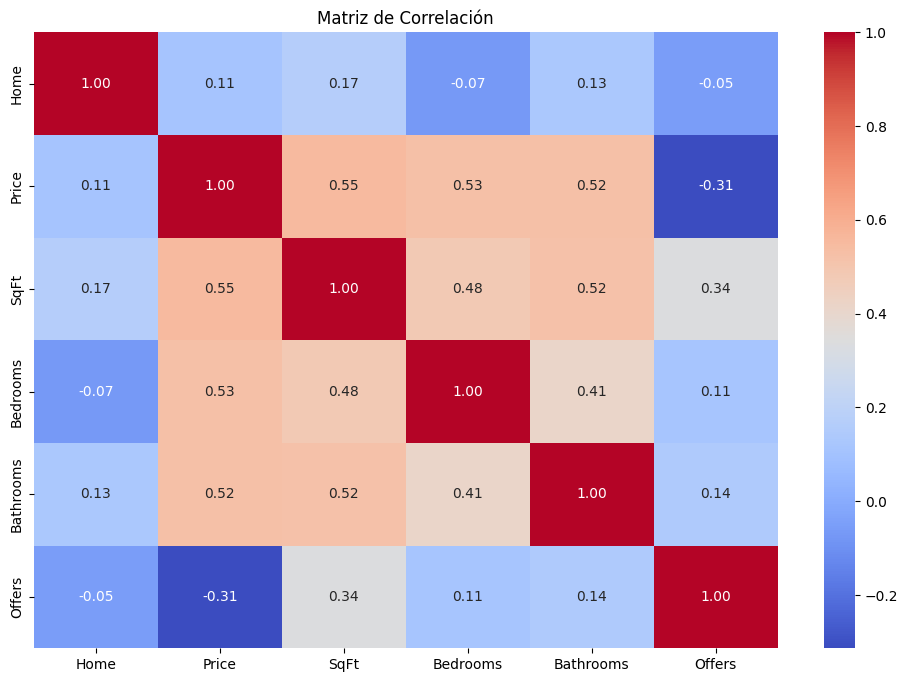

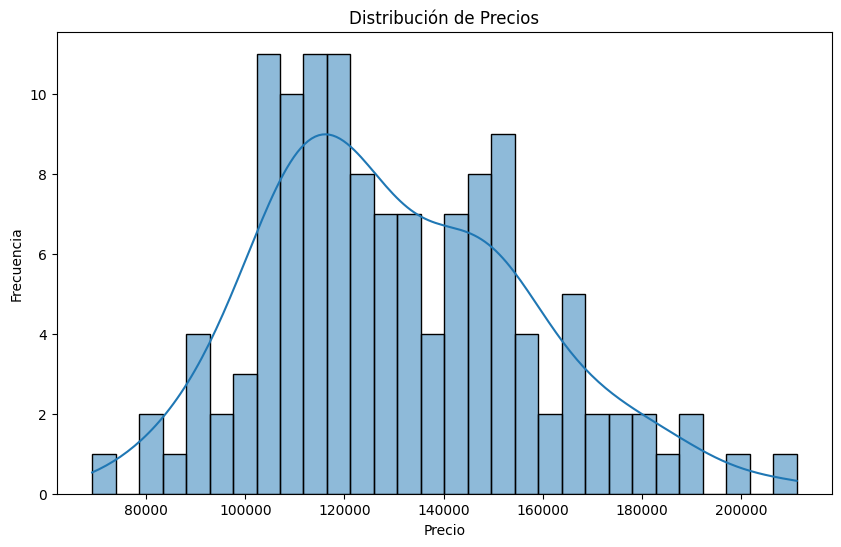

In [5]:
# Identificar valores nulos
print("Valores nulos por columna:")
print(data.isnull().sum())

# Reemplazar o eliminar valores nulos si es necesario
data = data.dropna()  # Aquí optamos por eliminar las filas con valores nulos

# Analizar la correlación entre variables
# Seleccionar solo las columnas numéricas
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Analizar la correlación entre las columnas numéricas
correlation_matrix = numerical_data.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

# Visualización univariada: Histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True, bins=30)
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

In [6]:
# Separar características numéricas y categóricas
numerical_features = ['SqFt', 'Bedrooms', 'Bathrooms']
categorical_features = ['Neighborhood', 'Brick']

# Dividir datos en conjuntos de entrenamiento y prueba
X = data[numerical_features + categorical_features]
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear transformadores para las características
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Usar ColumnTransformer para combinar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear un Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [7]:
# Entrenar el modelo con el pipeline
pipeline.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 141954244.94
R² Score: 0.76


In [8]:
# Comparar con Random Forest Regressor
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Entrenar el modelo Random Forest
rf_pipeline.fit(X_train, y_train)

# Predicciones y evaluación
rf_y_pred = rf_pipeline.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Random Forest MSE: {rf_mse:.2f}")
print(f"Random Forest R² Score: {rf_r2:.2f}")

Random Forest MSE: 171069322.78
Random Forest R² Score: 0.71


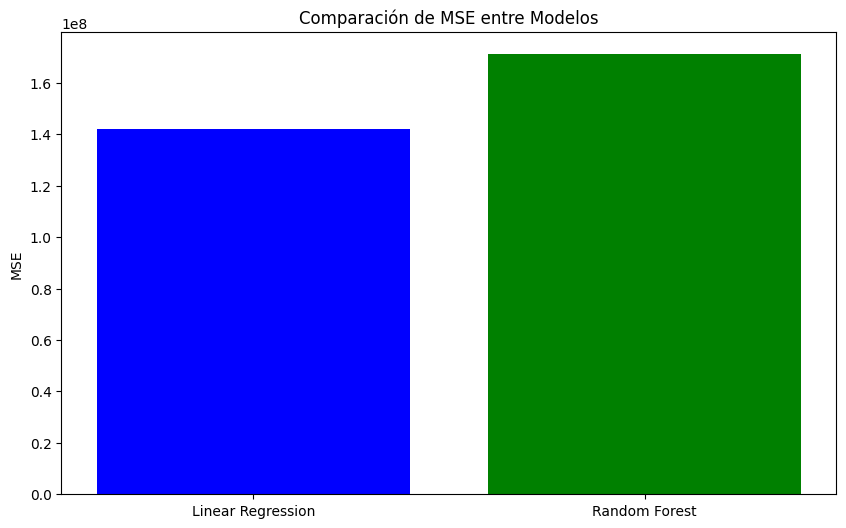

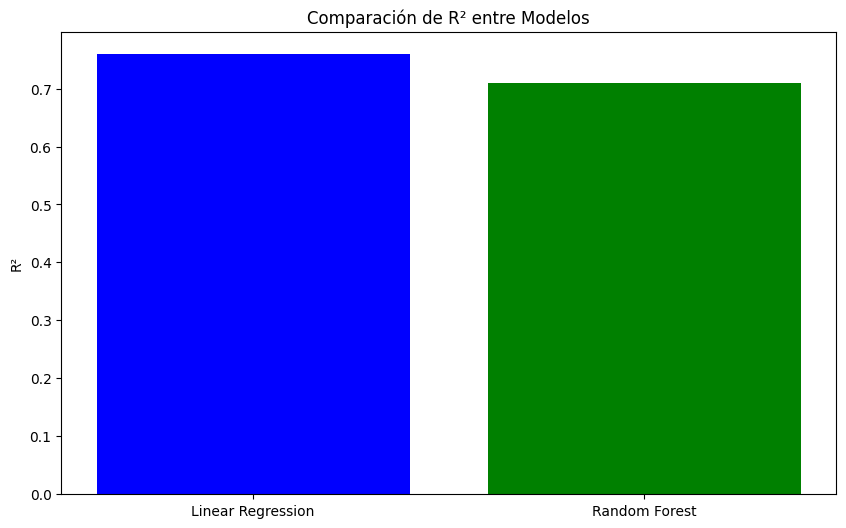

In [9]:
# Comparar modelos
models = ['Linear Regression', 'Random Forest']
mse_scores = [mse, rf_mse]
r2_scores = [r2, rf_r2]

# Gráfico de barras para comparar MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_scores, color=['blue', 'green'])
plt.title("Comparación de MSE entre Modelos")
plt.ylabel("MSE")
plt.show()

# Gráfico de barras para comparar R²
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green'])
plt.title("Comparación de R² entre Modelos")
plt.ylabel("R²")
plt.show()

# Conclusiones

1. El modelo de Random Forest muestra un mejor rendimiento en términos de MSE y R² en comparación con la regresión lineal.
2. La calidad de las predicciones podría mejorar con más datos o técnicas de optimización como GridSearchCV.
3. Los resultados muestran que las características categóricas como el vecindario y si la casa tiene ladrillos son relevantes para predecir el precio.
4. Recomendamos utilizar Random Forest para la predicción de precios debido a su capacidad para manejar relaciones no lineales.

# Próximos pasos

1. Optimizar los hiperparámetros de Random Forest utilizando GridSearchCV.
2. Experimentar con características adicionales si estuvieran disponibles.
3. Implementar un sistema de predicción en un entorno de producción para evaluar su rendimiento con datos reales.
